In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.duplicated().sum()
df["customerID"].duplicated().sum()

np.int64(0)

In [9]:
def conv(value) :
    if value == 1 :
        return "yes"
    else :
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# From SeniorCitizen column 0 and 1 are converted into yes/no for easy understanding

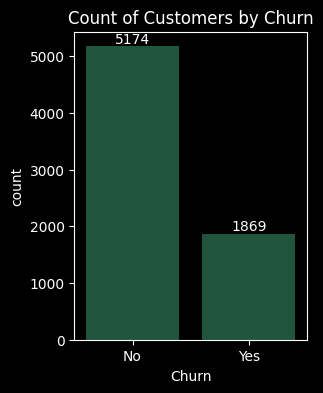

In [51]:
plt.figure(figsize=(3,4))
cnt = sns.countplot(x = "Churn", data = df, color="#185D3C")
cnt.bar_label(cnt.containers[0])
plt.title("Count of Customers by Churn", fontsize = 12)
plt.show()


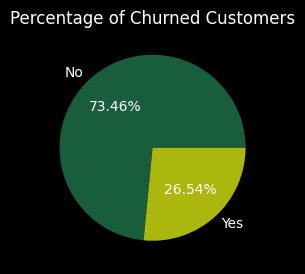

In [50]:
grp = df.groupby("Churn").agg({"Churn":"count"})
plt.figure(figsize=(3,4))
plt.pie(grp["Churn"], labels = grp.index, autopct= "%1.2f%%", colors=["#185D3C", "#ACB70E"])
plt.title("Percentage of Churned Customers", fontsize = 12)
plt.show()

# from the given pie chart we can conclude that 26.54% of our customers have churned out.
# Now let's explore the reason behind it.

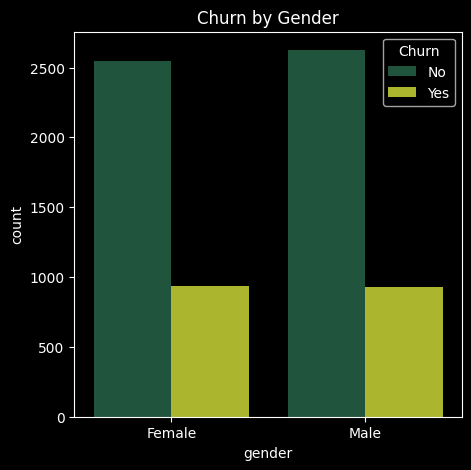

In [49]:
plt.figure(figsize = (5,5))
sns.countplot(x = "gender", data = df, hue = "Churn", color = "black" ,palette={"No": "#185D3C", "Yes": "#C0CC17"})
plt.title("Churn by Gender", fontsize = 12)
plt.show()

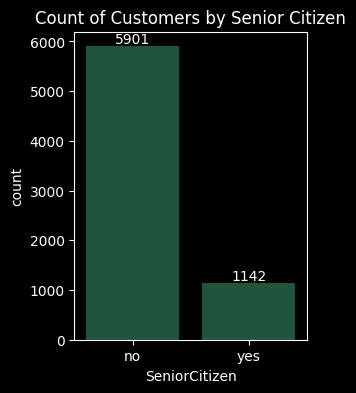

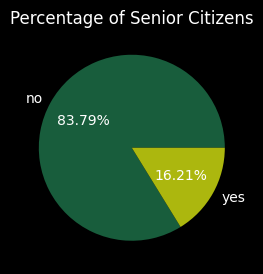

In [48]:
plt.figure(figsize = (3,4))
cnt = sns.countplot(x = "SeniorCitizen", data = df,color="#185D3C")
cnt.bar_label(cnt.containers[0])
plt.title("Count of Customers by Senior Citizen", fontsize = 12)
plt.show()

grp = df["SeniorCitizen"].value_counts()
plt.figure(figsize=(3,4))
plt.pie(grp.values, labels=grp.index, autopct="%1.2f%%", colors=["#185D3C", "#ACB70E"])
plt.title("Percentage of Senior Citizens", fontsize=12)
plt.show()


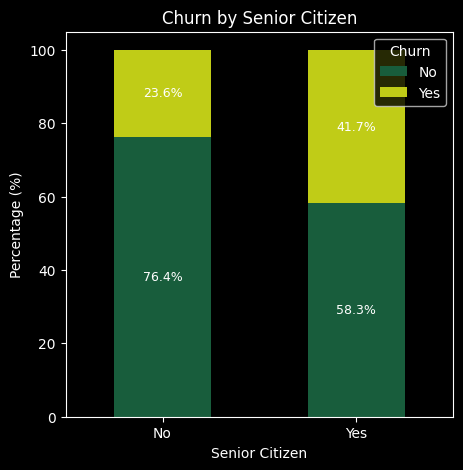

In [39]:
grp2 = (df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100)
fig, ax = plt.subplots(figsize=(5, 5))
grp2.plot(kind="bar",stacked=True,ax=ax,color=["#185D3C", "#C0CC17"])

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x, y = patch.get_xy()
    ax.text(
        x + width / 2,
        y + height / 2,
        f"{height:.1f}%",
        ha="center",
        va="center",
        fontsize=9,
        color="white" )

ax.set_title("Churn by Senior Citizen")
ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Percentage (%)")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No", "Yes"], rotation=0)
ax.legend(title="Churn", loc="upper right")

plt.show()


# Comparatively a greater percentage of people in senior citizen category have churned.

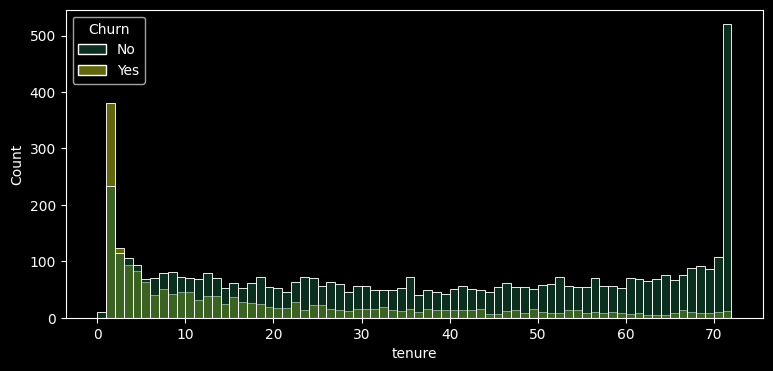

In [ ]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn", color = "black" ,palette={"No": "#185D3C", "Yes": "#C0CC17"})
plt.show()

# People who have used our services for long time has stayed and people who have used our serivices for one or two months churned. 

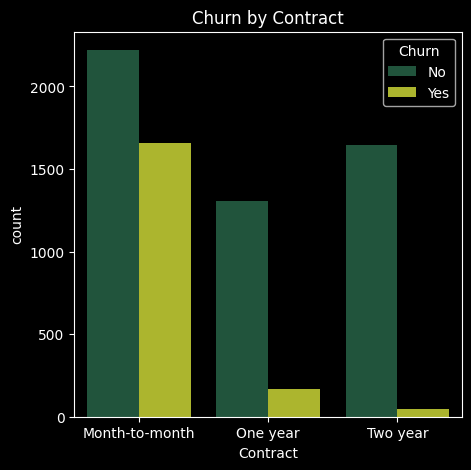

In [29]:
plt.figure(figsize = (5,5))
sns.countplot(x = "Contract", data = df, hue = "Churn", color = "black" ,palette={"No": "#185D3C", "Yes": "#C0CC17"})
plt.title("Churn by Contract", fontsize = 12)
plt.show()


# People who have month to month contract are likely to churn most then from those who have one or two years of contracts 

In [18]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

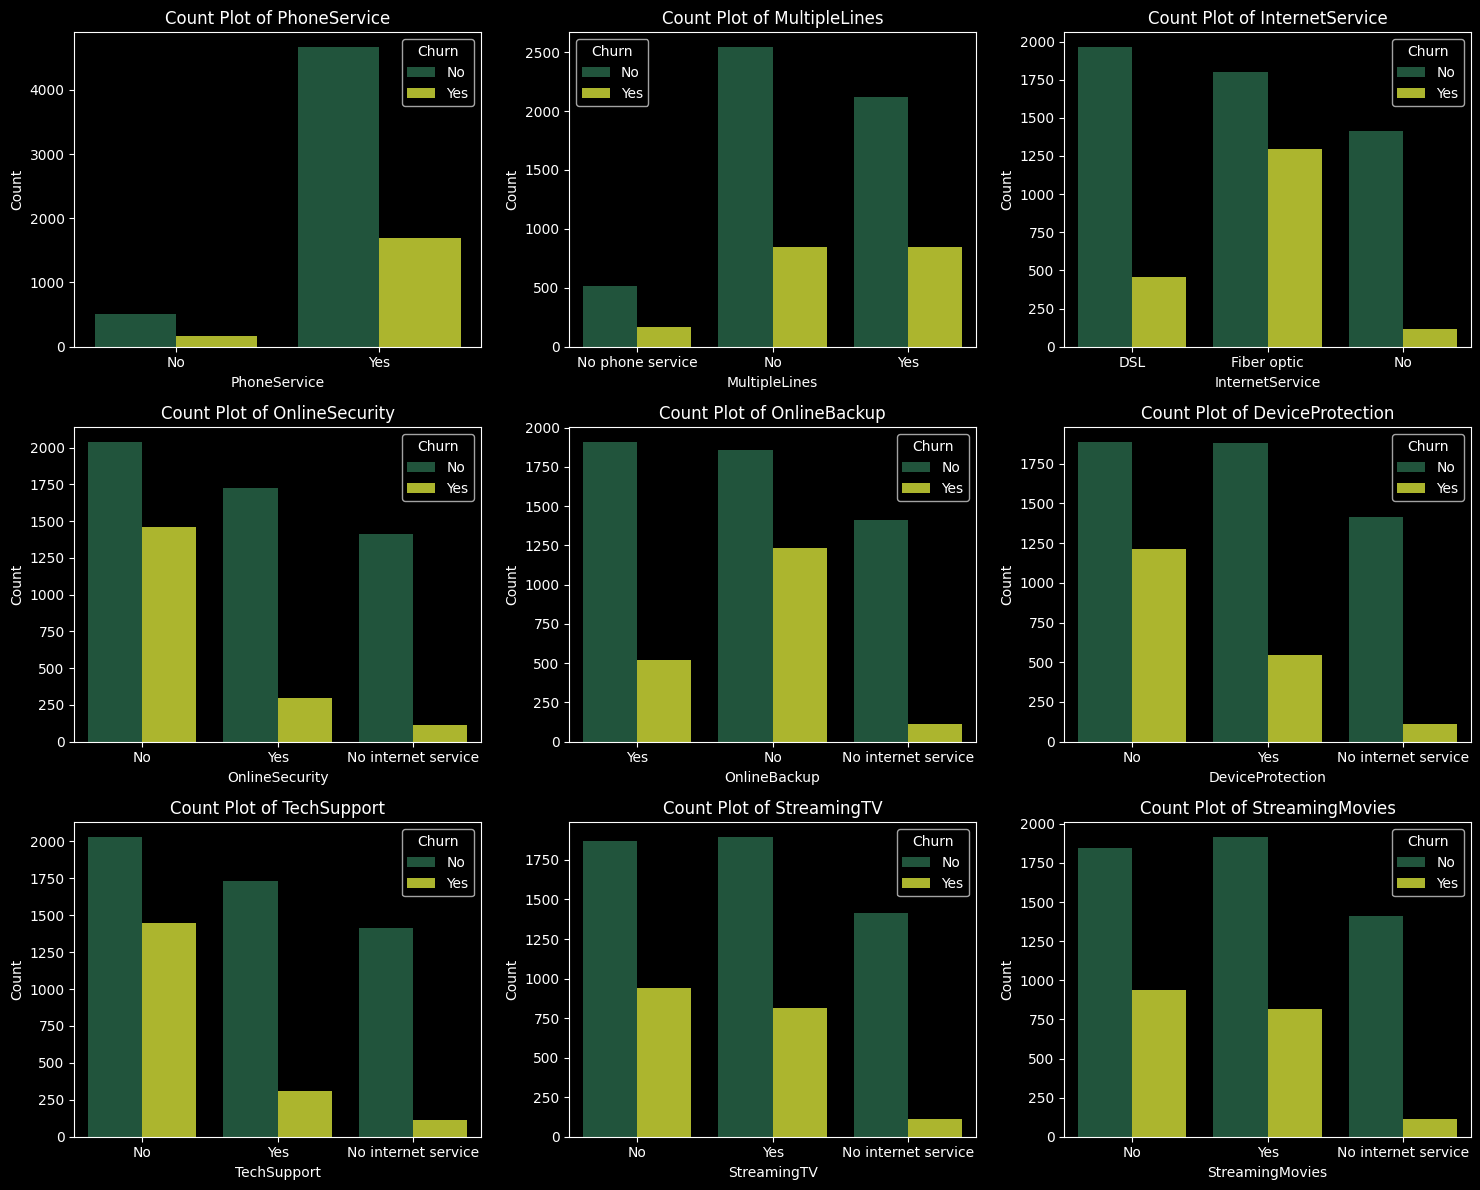

In [28]:

columns = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
cols = 3
rows = (len (columns) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize = (15, rows * 4))

axes = axes.flatten()

for i, col in enumerate(columns) :
    sns.countplot(x = col, data = df, ax = axes[i], hue = "Churn", color = "black" ,palette={"No": "#185D3C", "Yes": "#C0CC17"})
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range (i + 1, len(axes)) :
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


# Internet service type strongly influences churn: Customers using fiber optic internet exhibit notably higher churn compared to DSL users, while customers without internet service show minimal churn.
# Value-added services reduce churn: Subscriptions to OnlineSecurity, TechSupport, DeviceProtection, and OnlineBackup are associated with lower churn rates.
# TechSupport and OnlineSecurity are key retention factors: Customers lacking these services churn at a significantly higher rate.
# Streaming services have limited impact on retention: StreamingTV and StreamingMovies do not meaningfully reduce churn despite high adoption.
# PhoneService is not a strong differentiator: Although widely used, phone service does not substantially affect churn behavior.

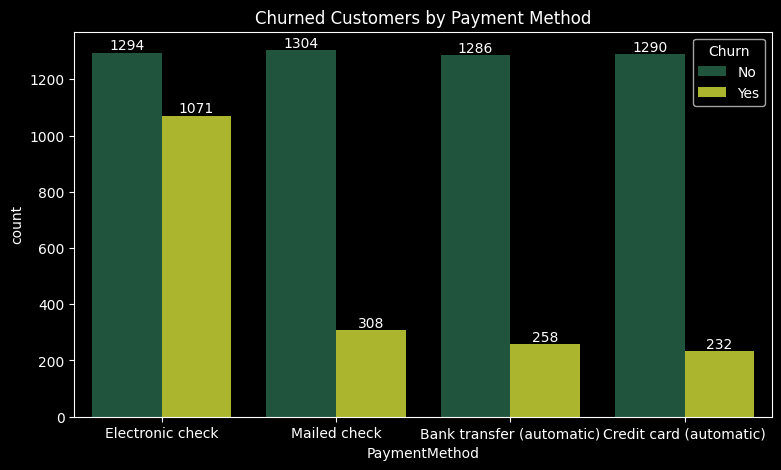

In [32]:
plt.figure(figsize = (9,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn", color = "black" ,palette={"No": "#185D3C", "Yes": "#C0CC17"})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method", fontsize = 12)
plt.show()

# Customer is likely to churn when he is using electronic check as payment method.

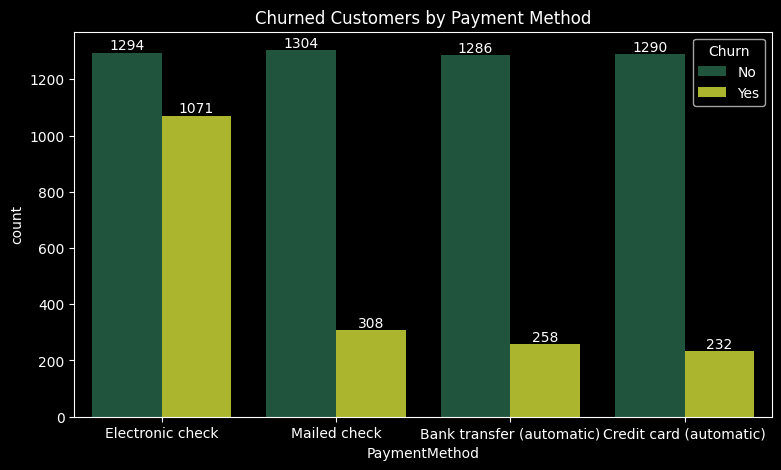

In [31]:
plt.figure(figsize = (9,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn", color = "black" ,palette={"No": "#185D3C", "Yes": "#C0CC17"})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method", fontsize = 12)
plt.show()

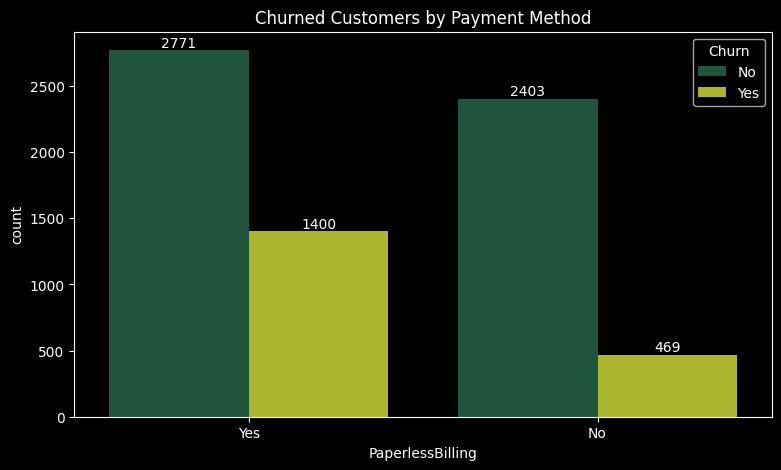

In [30]:
plt.figure(figsize = (9,5))
ax = sns.countplot(x = "PaperlessBilling", data = df, hue = "Churn", color = "black" ,palette={"No": "#185D3C", "Yes": "#C0CC17"})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method", fontsize = 12)
plt.show()